Davide Pasetto - 

Deborah Aloisi - 249948

# Exercise 1



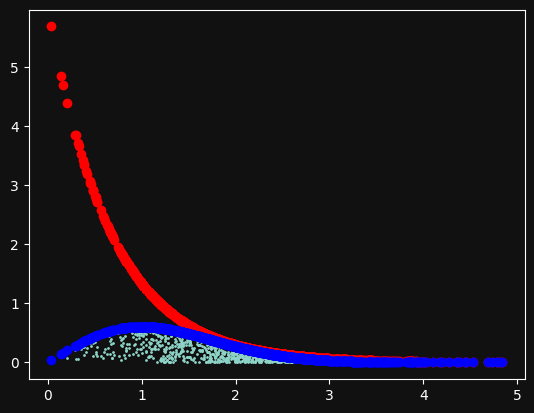

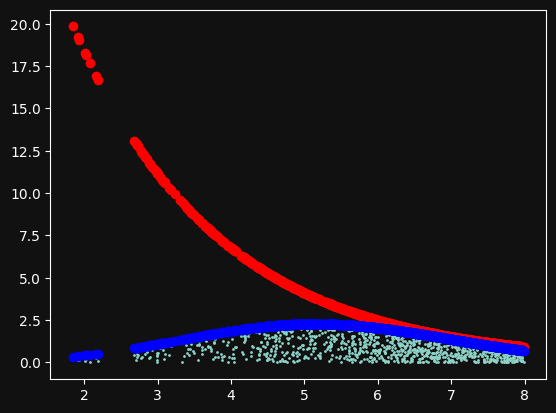

In [164]:
import numpy as np
import seaborn as sns
from scipy.special import i0
import scipy.stats as st
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import rayleigh
from scipy.stats import rice

o_nlos=1
o_los=2
v_los=2

def nlos(x):
    return (x/o_nlos**2)*np.exp(-x**2/(2*o_nlos**2))

def los(x):
    return (x/o_los**2)*np.exp(-(x**2+v_los**2)/(2*o_los**2))*i0(x)*(x*v_los/o_los**2)


def exp(x,l,a):
    return a*(l*np.exp(-l*(x)))

sigma = 1
num_samples=1000 

def sample_ray():
    l= 1.5
    a=4
    while True:
        x = random.uniform(0, 8)
        y_ray = nlos(x)#np.random.rayleigh(sigma)
        #print("Ray: "+str(y_ray))
        y_exp = exp(x,l,a)#np.random.exponential(scale=sigma)
        #print("EXP:"+str(y_exp))
        point = random.uniform(0, y_exp)
        #print("POINT:" + str(point))
    
        if y_ray>y_exp:
            print("NOT RIGHT DISTRIBUTION")
        if point <= y_ray:
            break
    return x, point, y_exp, y_ray

def sample_rice():
    l=0.5
    a=100
    while True:
        x = random.uniform(0, 8)
        y_rice = los(x)
        y_exp = exp(x,l,a)
        point = random.uniform(0, y_exp)
    
        if y_rice>y_exp:
            print("NOT RIGHT DISTRIBUTION")
        if point <= y_rice:
            break
    return x, point, y_exp, y_rice    


samples_ray = [sample_ray() for n in range(num_samples)]
samples_rice = [sample_rice() for n in range(num_samples)]


# Plot the samples
plt.figure(0)
plt.scatter([x[0] for x in samples_ray], [x[1] for x in samples_ray], s=1)
plt.scatter([x[0] for x in samples_ray], [x[2] for x in samples_ray], label='EXP PDF', color='red')
plt.scatter([x[0] for x in samples_ray], [x[3] for x in samples_ray], label='Rayleigh PDF', color='blue')
#plt.plot(samples, label='Rayleigh PDF')
#plt.xlabel('X1 - x coordinate [m]')
#plt.ylabel('X2 - y coordinate [m]')
#ax =  plt.gca()
#ax.set_aspect('equal')
plt.figure(1)
plt.scatter([x[0] for x in samples_rice], [x[1] for x in samples_rice], s=1)
plt.scatter([x[0] for x in samples_rice], [x[2] for x in samples_rice], label='EXP PDF', color='red')
plt.scatter([x[0] for x in samples_rice], [x[3] for x in samples_rice], label='Rayleigh PDF', color='blue')
#plt.plot(samples, label='Rayleigh PDF')
#plt.xlabel('X1 - x coordinate [m]')
#plt.ylabel('X2 - y coordinate [m]')
plt.show()



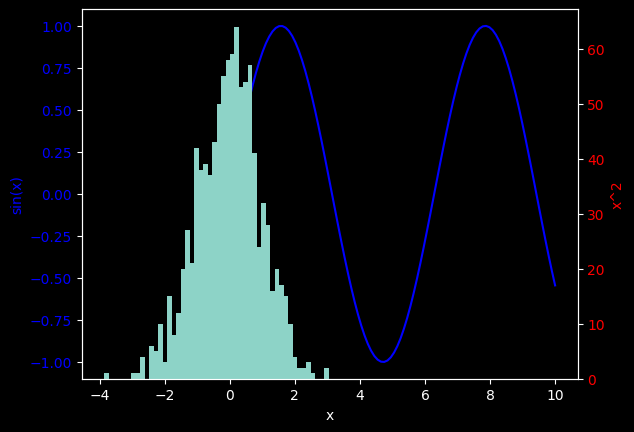

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = x**2

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first line
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('x')
# Make the y-axis label and tick labels match the line color
ax1.set_ylabel('sin(x)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# Plot the second line
# Create a random data set
data = np.random.normal(size=(1000))

# Plot the histogram
ax2.hist(data, bins=50)

#plot a histogram?
#ax2.plot(x, y2, 'r-')
# Make the y-axis label and tick labels match the line color
ax2.set_ylabel('x^2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Show the plot
plt.show()

In [161]:
import numpy as np

def rayleigh_reject_sampling(o, n):
    """
    Generate n random variates from a Rayleigh distribution with scale parameter o using reject sampling.
    """
    # Define the exponential pdf
    l = 1 / np.sqrt(2 * o**2)
    f_Y = lambda y: l * np.exp(-l * y)

    # Define the Rayleigh pdf
    f_X = lambda x: (x / o**2) * np.exp(-x**2 / (2 * o**2))

    # Define the scaling factor
    c = 1 / o * np.exp(-1/2)

    # Initialize the list of accepted samples
    samples = []

    # Generate n random variates
    while len(samples) < n:
        # Generate a random variate from the exponential distribution
        y = np.random.exponential(scale=1/l)

        # Check if the random variate is accepted
        if np.random.rand() < c * f_Y(y) / f_X(y):
            samples.append(y)

    return np.array(samples)

o = 2
n = 1000
samples = rayleigh_reject_sampling(o, n)
print(f"The first 10 samples are {samples[:10]}")

The first 10 samples are [0.33295873 0.28921012 1.88816404 1.28476994 0.4051205  0.11888035
 0.2099433  8.93586994 0.76604108 7.04599437]


0.3976370808947323
1.3185886126583892
0.7988534650433207
1.8134783760301227
0.3907667821611845
0.4602519678742942
1.461844995211187
1.0709302795518627
0.45149046768227397
0.7631360750010983
1.8560873349956066
0.38196488156266545
2.5321031601632624
0.9155501546318299
3.573650086435093
0.7240780055717915
0.1137505681184814
3.155034302670351
0.89320317457089
0.8834538530364278
0.302452125818199
0.549276219767481
0.7693420783747633
0.08904920998735438
1.5885795884830511
0.4876388993950024
0.10711254834182155
1.479353201744256
4.836276245837999
0.61100412217164
0.2823320745002132
3.0314661294034293
0.19727229998367643
0.2092363784309385
1.2810983282201887
0.05426908727192183
1.2625059618591856
0.07341465822527606
0.14577337948427027
1.2257914730416712
1.337633080506148
0.1690515039849265
0.6017107841386221
1.601622529090063
0.07339109000673695
0.9810575057087224
0.8629493306226962
0.058064224676275374
0.9550969623507062
0.1596050866795723
1.066990827493393
0.04529431285272254
0.520329171017

0

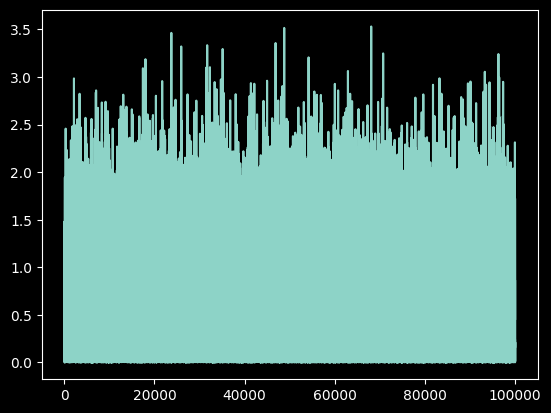

In [40]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import rayleigh
from scipy.stats import rice



def sample_rayleigh(sigma):
    while True:
        u = np.random.exponential(scale=sigma)
        print(u)
        if np.random.rand() < np.exp(-u**2 / (2 * sigma**2)):
            return u


num_samples = 100000
rayleigh_samples = [sample_rayleigh(1) for n in range(num_samples)]

plt.plot(rayleigh_samples, label='Rayleigh PDF')
0

---

# Exercise 2



## 1


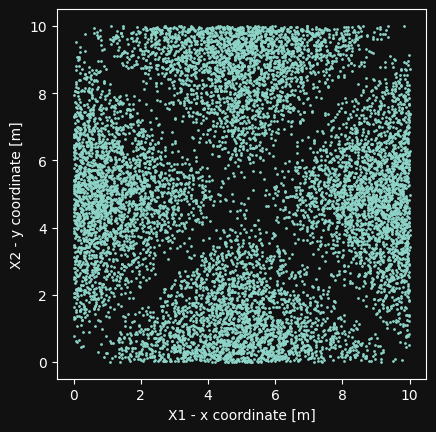

In [77]:
import matplotlib.pyplot as plt
import random

random.seed(42)  # for reproducibility

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)

num_samples = 10000
samples = [sample_vector() for n in range(num_samples)]

# Plot the samples
plt.scatter([x[0] for x in samples], [x[1] for x in samples], s=1)
plt.xlabel('X1 - x coordinate [m]')
plt.ylabel('X2 - y coordinate [m]')
ax =  plt.gca()
ax.set_aspect('equal')
plt.show()

## 2


Success probability: 0.9120
95% confidence interval: [0.8500, 0.9600]


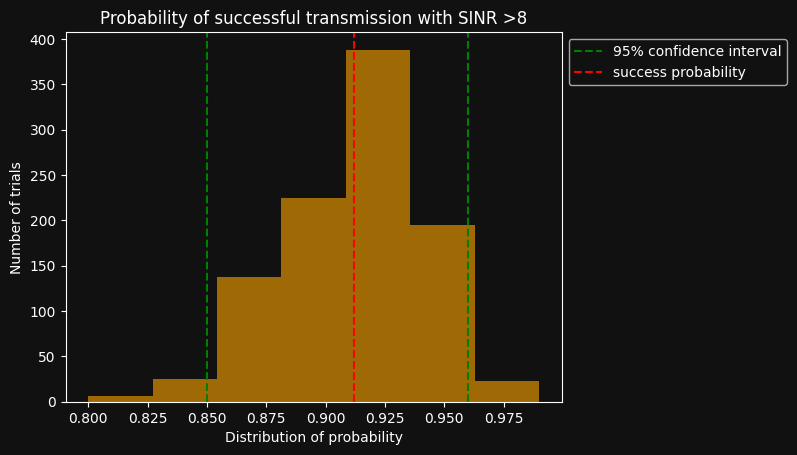

In [107]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 10000 
num_trials = 1000  # number of trials
num_pairs = 100  # number of pairs per trial
random.seed(42)

def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_snr(d_tx_rx):
    return (P_tx / (N * d_tx_rx**2))

def simulate_trial():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        while rx_index == tx_index:
            rx_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        snr = compute_snr(d_tx_rx)
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]


success_probabilities = []
trials = []
for n in range(num_trials):
    trial = simulate_trial()
    success_probabilities.append(trial)
    trials.append(n)


success_probability = np.mean(success_probabilities)
confidence_interval = np.percentile(success_probabilities, [2.5, 97.5])
print(f"Success probability: {success_probability:.4f}")
print(f"95% confidence interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

plt.hist(success_probabilities, color='orange', alpha=0.6, bins=7)
plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval[1], color="green", ls="--")
plt.axvline(x=success_probability, color="red", ls="--", label="success probability")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title( "Probability of successful transmission with SINR >8")
plt.show()


## 3


  d:1.4430981148807913, di:7.276636632083249 - d/di:0.1983193868054454--> d<di :True
  d:1.8611827367620295, di:5.751831206141496 - d/di:0.32358090320431493--> d<di :True
  d:0.5758788533278905, di:6.606901579179917 - d/di:0.08716322567035599--> d<di :True
  d:1.1686535483416414, di:5.172343307640719 - d/di:0.22594276497758303--> d<di :True
  d:0.6153671677901515, di:3.5871448489170756 - d/di:0.17154790054712313--> d<di :True
  d:0.6269685090699956, di:3.787013318820978 - d/di:0.1655575136094825--> d<di :True
  d:0.5638332020459316, di:6.660301947728681 - d/di:0.08465580186469052--> d<di :True
  d:2.047758119397009, di:7.860508255532918 - d/di:0.2605121771808606--> d<di :True
  d:2.8424807443492766, di:9.593282831667244 - d/di:0.29629906615140145--> d<di :True
  d:0.8201241131034227, di:6.2880112755971 - d/di:0.13042662889079265--> d<di :True
  d:0.8363469780967124, di:4.694681460547155 - d/di:0.1781477582931128--> d<di :True
  d:1.3479643194920077, di:6.761545588979671 - d/di:0.199357

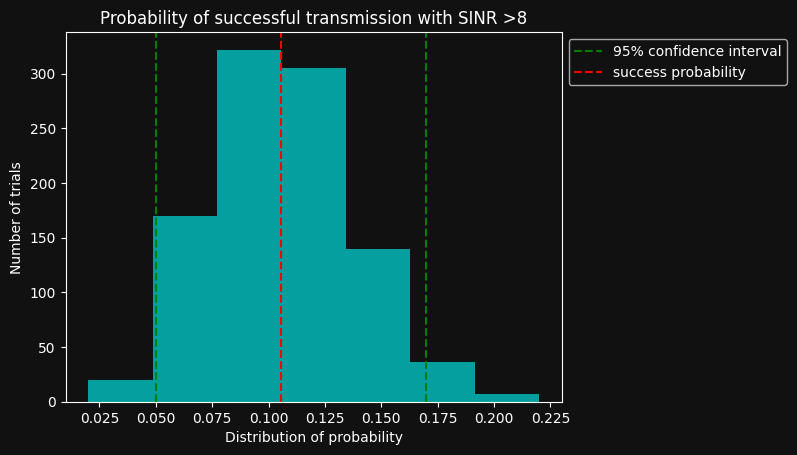

In [113]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 10000 
num_trials = 1000  # number of trials
num_pairs = 100  # number of pairs per trial
random.seed(42)

def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_sinr(d_tx_rx, d_txI_rx):
    return ((P_tx*d_tx_rx**(-2)) / (N + P_tx*d_txI_rx**(-2)))

def simulate_trial():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        txI_index = random.randint(0, num_samples-1)
        while rx_index == tx_index or txI_index == tx_index or rx_index == txI_index:
            rx_index = random.randint(0, num_samples-1)
            txI_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        d_txI_rx = compute_distance(samples[tx_index], samples[txI_index])
        sinr = compute_sinr(d_tx_rx, d_txI_rx)
        if sinr > 8:
            success_count += 1
            print("  d:"+str(d_tx_rx)+", di:"+str(d_txI_rx)+" - d/di:"+str(d_tx_rx/d_txI_rx) + "--> d<di :"+str(bool(d_tx_rx<d_txI_rx)))#+" -- se :"+ str(bool(d_txI_rx-d_tx_rx>2)))
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]


success_probabilities = []
for n in range(num_trials):
    trial = simulate_trial()
    success_probabilities.append(trial)

success_probability = np.mean(success_probabilities)
confidence_interval = np.percentile(success_probabilities, [2.5, 97.5])
print(f"Success probability: {success_probability:.4f}")
print(f"95% confidence interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

plt.hist(success_probabilities, color='cyan', alpha=0.6, bins=7)
plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval[1], color="green", ls="--")
plt.axvline(x=success_probability, color="red", ls="--", label="success probability")
plt.title( "Probability of successful transmission with SINR >8")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

## 4

SNR:Success probability: 0.6764
SNR:95% confidence interval: [0.5800, 0.7602]
SINR:Success probability: 0.1617
SINR:95% confidence interval: [0.1000, 0.2400]


<function matplotlib.pyplot.show(close=None, block=None)>

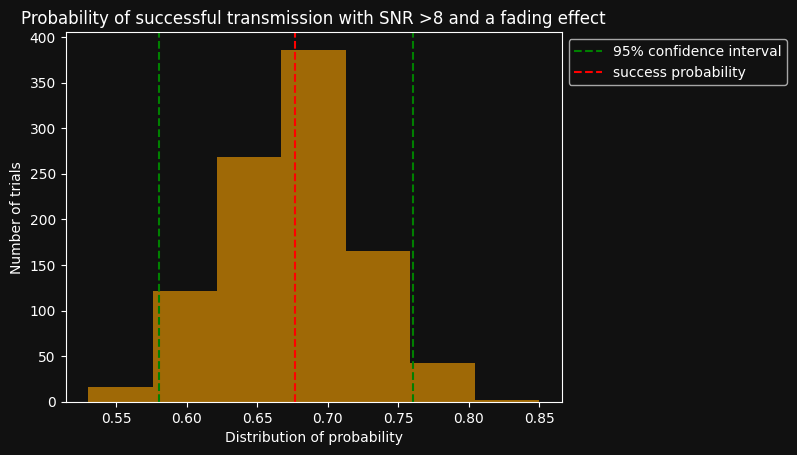

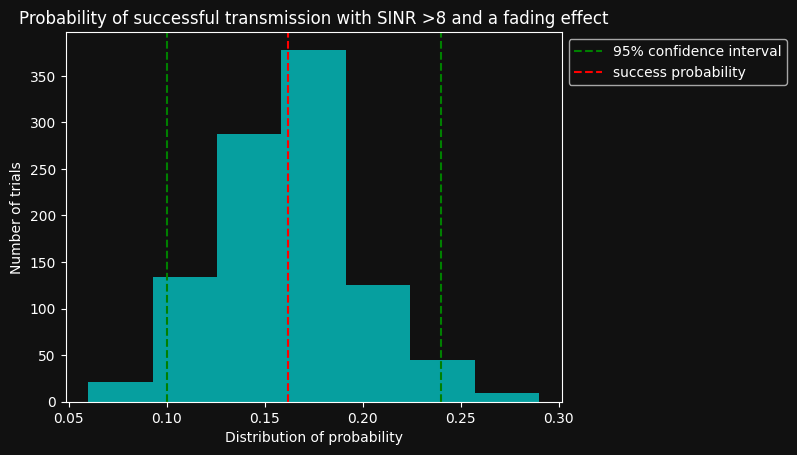

In [90]:
import random
import numpy as np

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 10000
num_sample_exp = 1000
num_trials = 1000  # number of trials
num_pairs = 100  # number of pairs per trial
random.seed(42)

# exponential variable ξtx
e_mean = 1 # 1/lambda
def sample_exponential(mean):
    return -mean * np.log(1 - random.random())

def exp_def():
    exp_samples = [sample_exponential(e_mean) for n in range(num_sample_exp)]
    e_index = random.randint(0, num_sample_exp-1)
    e = exp_samples[e_index]
    return e




def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_snr_f(d_tx_rx,e_tx):
    return (P_tx * e_tx/ (N * d_tx_rx**2))

def compute_sinr_f(d_tx_rx, d_txI_rx, e_tx, e_I):
    return ((P_tx*e_tx*d_tx_rx**(-2)) / (N + P_tx*e_I*d_txI_rx**(-2)))



def simulate_trial_snr_f():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        while rx_index == tx_index:
            rx_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        snr = compute_snr_f(d_tx_rx, exp_def())
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def simulate_trial_sinr_f():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        txI_index = random.randint(0, num_samples-1)
        while rx_index == tx_index or txI_index == tx_index or rx_index == txI_index:
            rx_index = random.randint(0, num_samples-1)
            txI_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        d_txI_rx = compute_distance(samples[tx_index], samples[txI_index])
        sinr = compute_sinr_f(d_tx_rx, d_txI_rx, exp_def(),exp_def())
        if sinr > 8:
            success_count += 1
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]
ax1, ax2 = plt.subplots()

success_probabilities_snr = []
for n in range(num_trials):
    trial = simulate_trial_snr_f()
    success_probabilities_snr.append(trial)

success_probability_snr = np.mean(success_probabilities_snr)
confidence_interval_snr = np.percentile(success_probabilities_snr, [2.5, 97.5])
print(f"SNR:Success probability: {success_probability_snr:.4f}")
print(f"SNR:95% confidence interval: [{confidence_interval_snr[0]:.4f}, {confidence_interval_snr[1]:.4f}]")


success_probabilities_sinr = []
for n in range(num_trials):
    trial = simulate_trial_sinr_f()
    success_probabilities_sinr.append(trial)

success_probability_sinr = np.mean(success_probabilities_sinr)
confidence_interval_sinr = np.percentile(success_probabilities_sinr, [2.5, 97.5], method='normal_unbiased')
print(f"SINR:Success probability: {success_probability_sinr:.4f}")
print(f"SINR:95% confidence interval: [{confidence_interval_sinr[0]:.4f}, {confidence_interval_sinr[1]:.4f}]")


plt.figure(0)
plt.hist(success_probabilities_snr, color='orange', alpha=0.6, bins=7)

plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval_snr[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval_snr[1], color="green", ls="--")
plt.axvline(x=success_probability_snr, color="red", ls="--", label="success probability")
plt.title( "Probability of successful transmission with SNR >8 and a fading effect")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show

plt.figure(1)
plt.hist(success_probabilities_sinr, color='cyan', alpha=0.6, bins=7)

plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval_sinr[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval_sinr[1], color="green", ls="--")
plt.axvline(x=success_probability_sinr, color="red", ls="--", label="success probability")
plt.title( "Probability of successful transmission with SINR >8 and a fading effect")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show




----------------------------